In [1]:
url = 'https://www.gutenberg.org/files/2701/2701-h/2701-h.htm'

In [2]:
import requests

r = requests.get(url)
type(r)

requests.models.Response

In [4]:
html = r.text

#print(html)

In [6]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, "html5lib")
type(soup)

bs4.BeautifulSoup

In [7]:
soup.title

<title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>

In [8]:
soup.title.string

'\n      Moby Dick; Or the Whale, by Herman Melville\n    '

In [10]:
soup.find_all('a')[:8]

[<a href="#link2H_4_0002"> ETYMOLOGY. </a>,
 <a href="#link2H_4_0003"> EXTRACTS (Supplied by a Sub-Sub-Librarian).
         </a>,
 <a href="#link2HCH0001"> CHAPTER 1. Loomings. </a>,
 <a href="#link2HCH0002"> CHAPTER 2. The Carpet-Bag. </a>,
 <a href="#link2HCH0003"> CHAPTER 3. The Spouter-Inn. </a>,
 <a href="#link2HCH0004"> CHAPTER 4. The Counterpane. </a>,
 <a href="#link2HCH0005"> CHAPTER 5. Breakfast. </a>,
 <a href="#link2HCH0006"> CHAPTER 6. The Street. </a>]

### Getting the text from the html

In [11]:
text = soup.get_text()

In [13]:
#print(text)

## Tokenize using re

In [16]:
import re

sentence = 'peter piper pick a peck of pickled peppers'

ps = 'p\w+'

re.findall(ps, sentence)

['peter', 'piper', 'pick', 'peck', 'pickled', 'peppers']

In [17]:
re.findall('\w+', sentence)

['peter', 'piper', 'pick', 'a', 'peck', 'of', 'pickled', 'peppers']

In [18]:
tokens = re.findall('\w+', text)

tokens[:8]

['ï', 'Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman']

## Another way to tokenize via nltk

In [22]:
from nltk import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')

tokens = tokenizer.tokenize(text)

tokens[:8]

['ï', 'Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman']

In [24]:
words = []

for word in tokens:
    words.append(word.lower())
    
words[:8]

['ï', 'moby', 'dick', 'or', 'the', 'whale', 'by', 'herman']

### Removing Stop Words

In [25]:
import nltk

sw = nltk.corpus.stopwords.words('english')
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [26]:
words_ns = []

for word in words:
    if word not in sw:
        words_ns.append(word)
        
words_ns[:5]

['ï', 'moby', 'dick', 'whale', 'herman']

### Plot word frequency

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

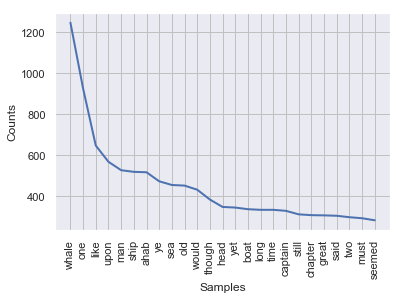

In [33]:
freq_dist = nltk.FreqDist(words_ns)
freq_dist.plot(25)

# Let's make a function for this task

In [35]:
def plot_freq_of_words(url):
    
    #Make the request
    
    r = requests.get(url)
    
    # Extract html from the response
    
    html = r.text
    
    # create beautiful soup object
    
    soup = BeautifulSoup(html, 'html5lib')
    
    # getting the text out of the soup
    
    text = soup.get_text()
    
    # create tokenizer
    
    tokenizer = RegexpTokenizer('\w+')

    # create tokens
    
    tokens = tokenizer.tokenize(text)
    
    # loop through all the tokens and make them lower case
    
    words = []
    
    for word in tokens:
        words.append(word.lower())
        
    # get english stopwords
    
    sw = nltk.corpus.stopwords.words('english')
    
    # initialize a new list
    
    words_ns = []
    
    # add all words to words_ns that are in words but not in sw
    
    for word in words:
        if words not in sw:
            words_ns.append(word)
            
    # now finally create a frq dist and plot it
    
    freq_dist = nltk.FreqDist(words_ns)
    freq_dist.plot(25)

### Robinson Crusoe

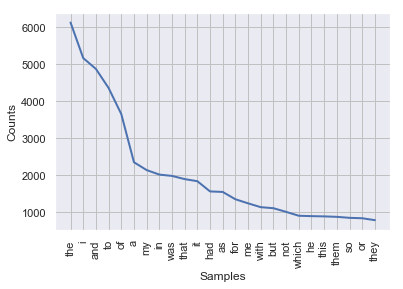

In [36]:
plot_freq_of_words('https://www.gutenberg.org/files/521/521-h/521-h.htm')